In [1]:
from simulated_annealing import SimulatedAnnealing

In [2]:
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
import time

In [4]:
optimal_dict = {}

In [5]:
def prd(value, optimal):
    return round((value - optimal)/optimal*100, 2)

In [6]:
prd(240, 212)

13.21

## SA testing for T

10 cities


In [19]:
cities10 = utils.read_matrix('test/10_test.txt')

In [20]:
cooling_factor = 0.99
end_T = 0.1

In [21]:
init_T = 10
prd_list = []
time_list = []
for i in range(2,80,1):
    avg_time_list = []
    avg_prd_list = []
    for _ in range(30):
        start = time.time()
        tour, length = SimulatedAnnealing(cities=cities10, init_T=init_T, end_T=end_T, cooling_factor=cooling_factor)
        end = time.time()
        avg_time_list.append(end-start)
        avg_prd_list.append(prd(length, 212))
    avg_prd = sum(avg_prd_list)/len(avg_prd_list)
    avg_time = sum(avg_time_list)/len(avg_time_list)
    prd_list.append(avg_prd)
    time_list.append(avg_time)
    init_T = 10**i
    if not i%10:
        print(i,end=' ')
print('ok', i)

10 20 30 40 50 60 70 ok 79


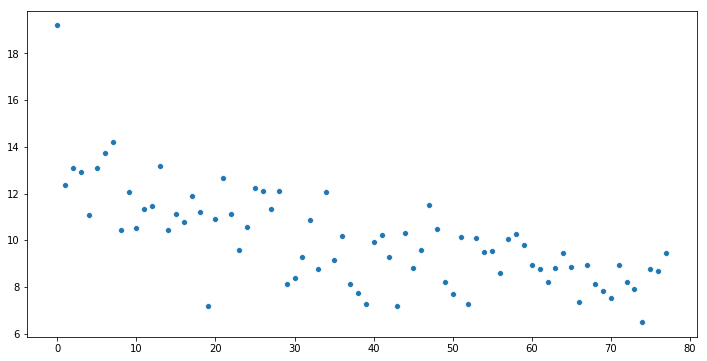

<Figure size 864x432 with 0 Axes>

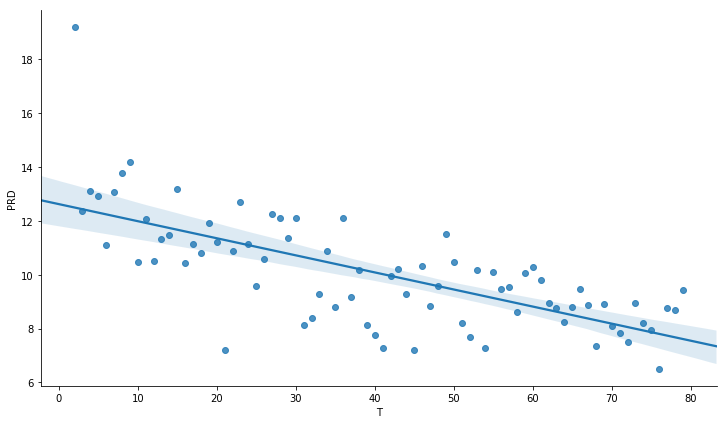

In [72]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = range(len(prd_list)), y = prd_list)
df = pd.DataFrame({'T':range(2,80,1), 'PRD':prd_list})
plt.figure(figsize=(12,6))
sns.lmplot(data = df, x = ('T'), y = ('PRD'),height=6, aspect=1.7)

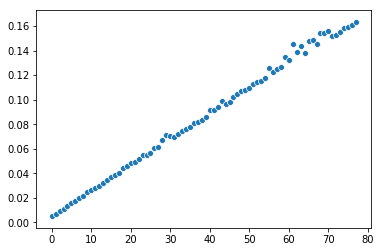

In [55]:
sns.scatterplot(x = range(len(time_list)), y = time_list)

# greedy 

/home/mikita/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


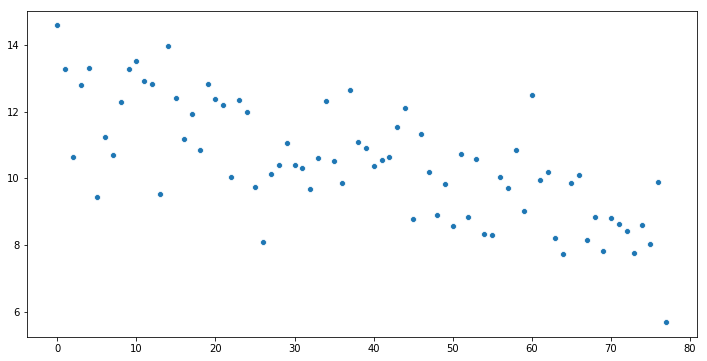

<Figure size 864x432 with 0 Axes>

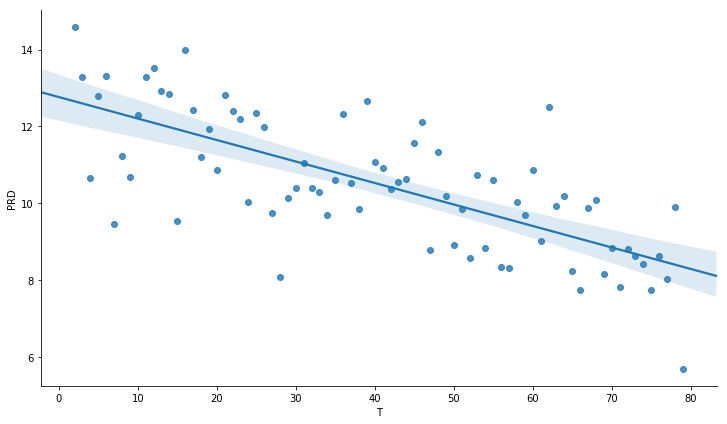

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = range(len(prd_list)), y = prd_list)
df = pd.DataFrame({'T':range(2,80,1), 'PRD':prd_list})
plt.figure(figsize=(12,6))
sns.lmplot(data = df, x = ('T'), y = ('PRD'),height=6, aspect=1.7)

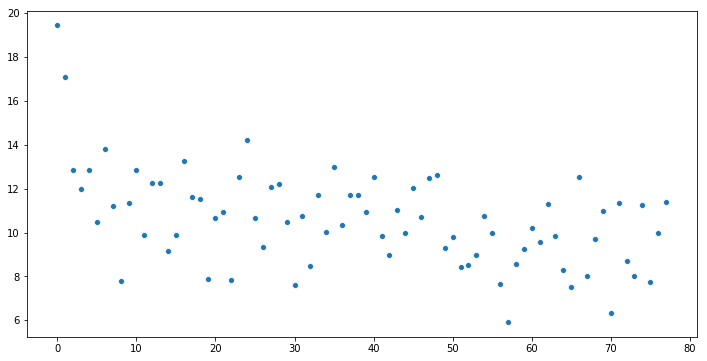

<Figure size 864x432 with 0 Axes>

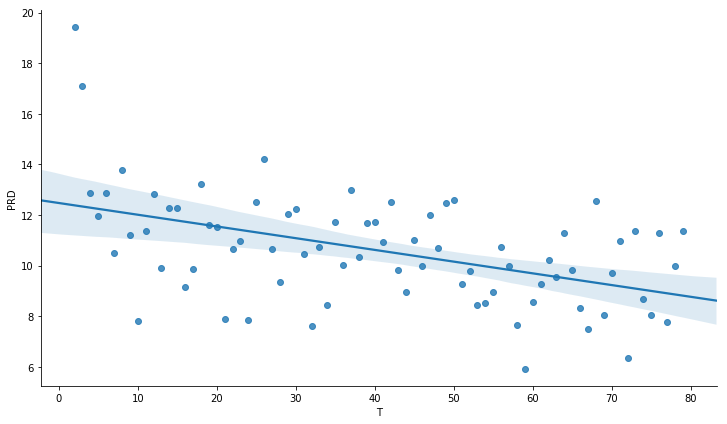

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = range(len(prd_list)), y = prd_list)
df = pd.DataFrame({'T':range(2,80,1), 'PRD':prd_list})
plt.figure(figsize=(12,6))
sns.lmplot(data = df, x = ('T'), y = ('PRD'),height=6, aspect=1.7)

## SA testing for cooling factor

10 cities

In [ ]:
cooling_factor = 0.99
end_T = 0.1
init_T = 10**10

In [84]:
prd_list = []
time_list = []
for i in np.arange(0.7,0.99,0.01):
    avg_time_list = []
    avg_prd_list = []
    for _ in range(30):
        start = time.time()
        tour, length = SimulatedAnnealing(cities=cities10, init_T=init_T, end_T=end_T, cooling_factor=i)
        end = time.time()
        avg_time_list.append(end-start)
        avg_prd_list.append(prd(length, 212))
    avg_prd = sum(avg_prd_list)/len(avg_prd_list)
    avg_time = sum(avg_time_list)/len(avg_time_list)
    prd_list.append(avg_prd)
    time_list.append(avg_time)
    if not i%10:
        print(i,end=' ')
print('ok', i)

ok 0.9900000000000002


/home/mikita/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


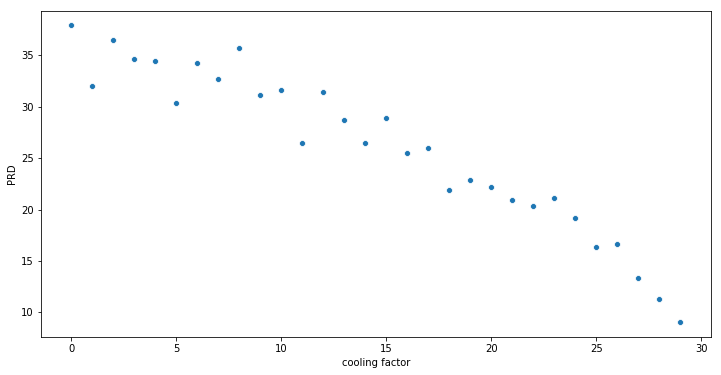

<Figure size 864x432 with 0 Axes>

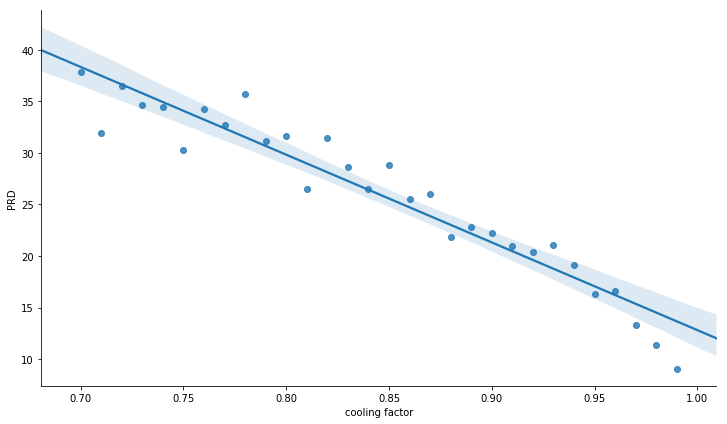

In [87]:
plt.figure(figsize=(12,6))
plt.xlabel('cooling factor')
plt.ylabel('PRD')
sns.scatterplot(x = range(len(prd_list)), y = prd_list)
df = pd.DataFrame({'cooling factor':np.arange(0.7,0.99,0.01), 'PRD':prd_list})
plt.figure(figsize=(12,6))
sns.lmplot(data = df, x = ('cooling factor'), y = ('PRD'),height=6, aspect=1.7)

## SA testing for different instancies

In [12]:
cooling_factor = 0.99
end_T = 0.1
init_T = 10**40

In [7]:
import os
os.chdir('test')
print(os.getcwd())
cities = []
for file in os.listdir():
    cities.append(utils.read_matrix(file))

/home/mikita/mikita/pea/test


In [8]:
cities.sort(key=len)
len(cities)

13

In [9]:
min_lengths = [132, 212,264,269,282,291,39,2707,1272,937,1610,699,25395]
len(min_lengths)

13

In [10]:
length_dict = {}
for i in range(len(min_lengths)):
    length_dict[len(cities[i])] = min_lengths[i]
length_dict

{6: 132,
 10: 212,
 12: 264,
 13: 269,
 14: 282,
 15: 291,
 17: 39,
 21: 2707,
 24: 1272,
 26: 937,
 29: 1610,
 42: 699,
 58: 25395}

In [13]:
prd_list = []
time_list = []
for matrix in cities:
    avg_time_list = []
    avg_prd_list = []
    for _ in range(30):
        start = time.time()
        tour, length = SimulatedAnnealing(cities=matrix, init_T=init_T, end_T=end_T, cooling_factor=cooling_factor)
        end = time.time()
        avg_time_list.append(end-start)
        avg_prd_list.append(prd(length, length_dict[len(matrix)]))
    avg_prd = sum(avg_prd_list)/len(avg_prd_list)
    avg_time = sum(avg_time_list)/len(avg_time_list)
    prd_list.append(avg_prd)
    time_list.append(avg_time)
    print(len(matrix), end=' ')
print('ok')

6 10 12 13 14 15 17 21 24 26 29 42 58 ok


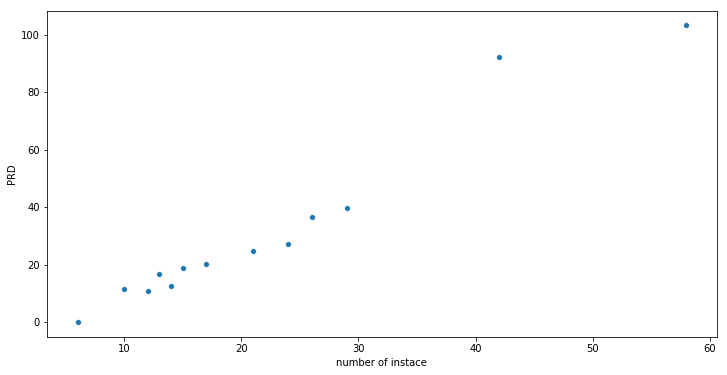

<Figure size 864x432 with 0 Axes>

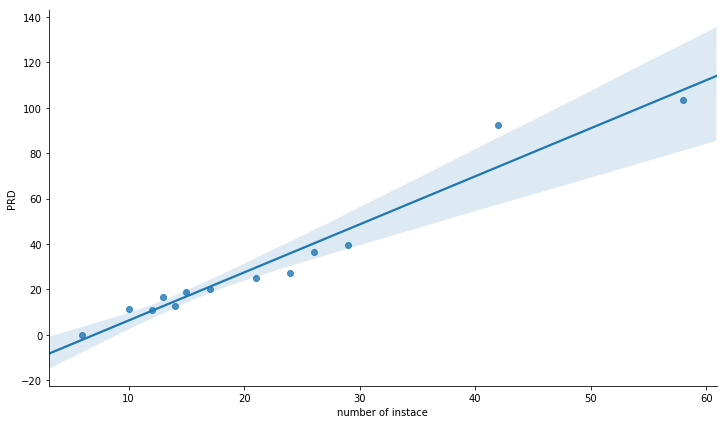

In [134]:
plt.figure(figsize=(12,6))
plt.xlabel('number of instace')
plt.ylabel('PRD')
sns.scatterplot(x = list(length_dict.keys()), y = prd_list)
df = pd.DataFrame({'number of instace':list(length_dict.keys()), 'PRD':prd_list})
plt.figure(figsize=(12,6))
sns.lmplot(data = df, x = ('number of instace'), y = ('PRD'),height=6, aspect=1.7)

## greedy

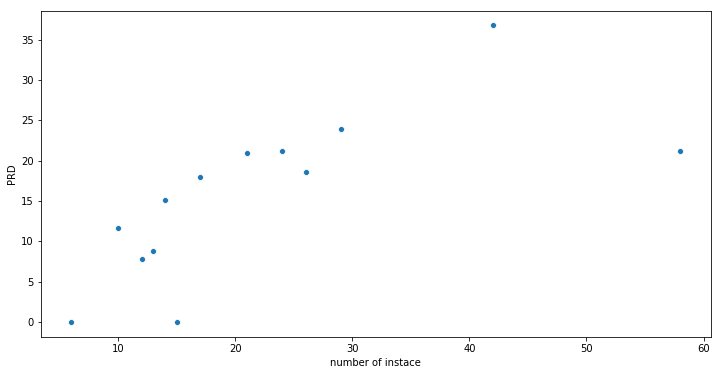

<Figure size 864x432 with 0 Axes>

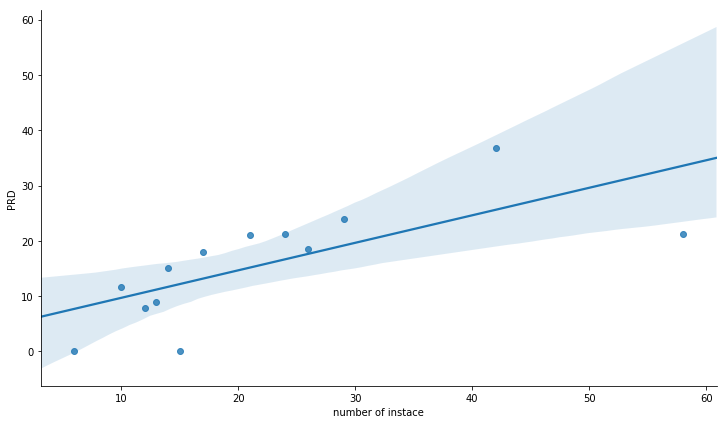

In [19]:
plt.figure(figsize=(12,6))
plt.xlabel('number of instace')
plt.ylabel('PRD')
sns.scatterplot(x = list(length_dict.keys()), y = prd_list)
df = pd.DataFrame({'number of instace':list(length_dict.keys()), 'PRD':prd_list})
plt.figure(figsize=(12,6))
sns.lmplot(data = df, x = ('number of instace'), y = ('PRD'),height=6, aspect=1.7)

# invert

/home/mikita/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


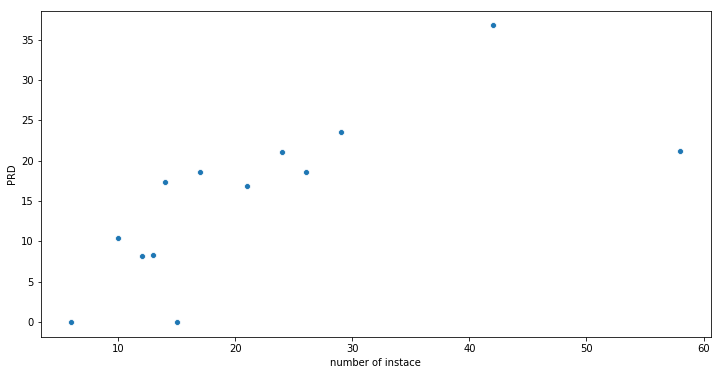

<Figure size 864x432 with 0 Axes>

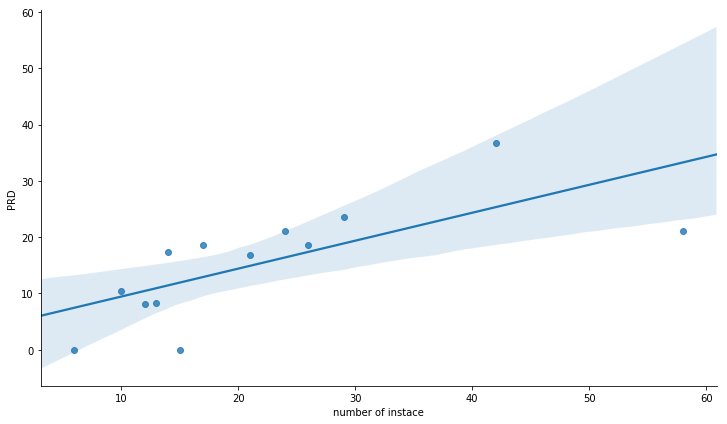

In [14]:
plt.figure(figsize=(12,6))
plt.xlabel('number of instace')
plt.ylabel('PRD')
sns.scatterplot(x = list(length_dict.keys()), y = prd_list)
df = pd.DataFrame({'number of instace':list(length_dict.keys()), 'PRD':prd_list})
plt.figure(figsize=(12,6))
sns.lmplot(data = df, x = ('number of instace'), y = ('PRD'),height=6, aspect=1.7)